In [1]:
import os
import random
import numpy as np
import imageio.v2 as imageio
import imgaug as ia
import imgaug.augmenters as iaa
%matplotlib inline

In [23]:
def pad_images(images, h, w, keep_aspect_ratio=False):
    max_width = max(img.shape[1] for img in images)
    max_height = max(img.shape[0] for img in images)

    print("Max width:", max_width)
    print("Max height:", max_height)

    padded_images = []
    seq1 = iaa.Sequential([iaa.PadToFixedSize(width=w, height=h, position="center", pad_cval=255)])
    seq2 = iaa.Sequential(iaa.Resize({"height": h, "width": w}))

    for img in images:
        if keep_aspect_ratio:
            padded_img = seq1.augment_image(img)
        else:
            padded_img = seq2.augment_image(img)
        padded_images.append(padded_img)

    return padded_images


In [3]:
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
import numpy as np

def show_images(images):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axis('off')
    ax.imshow(np.hstack(images), cmap='gray', alpha=1.0)
    ax.set_alpha(0.0)
    plt.show()

Resize:
Max width: 1793
Max height: 153
Max width: 1793
Max height: 153


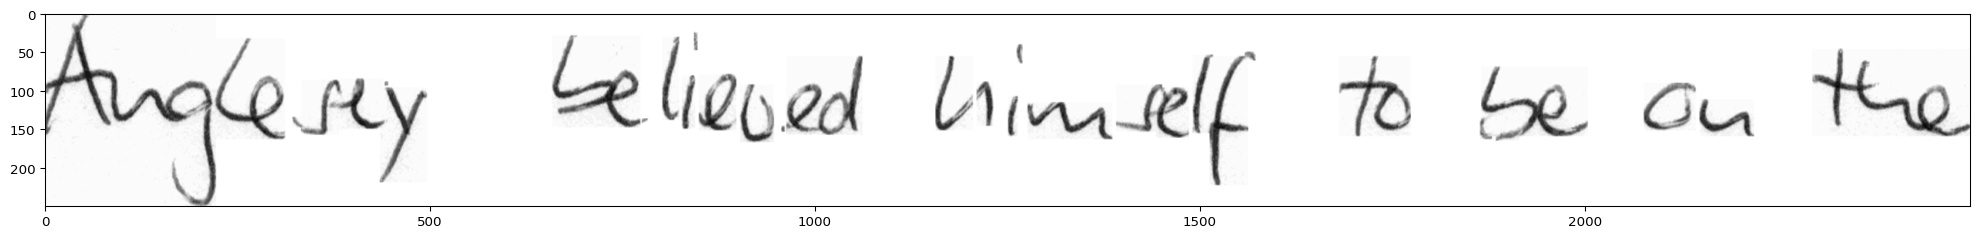

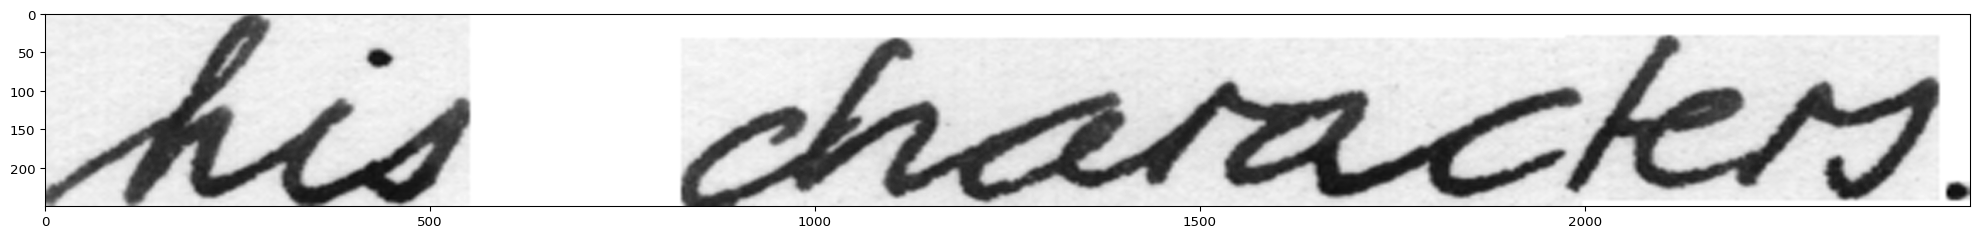

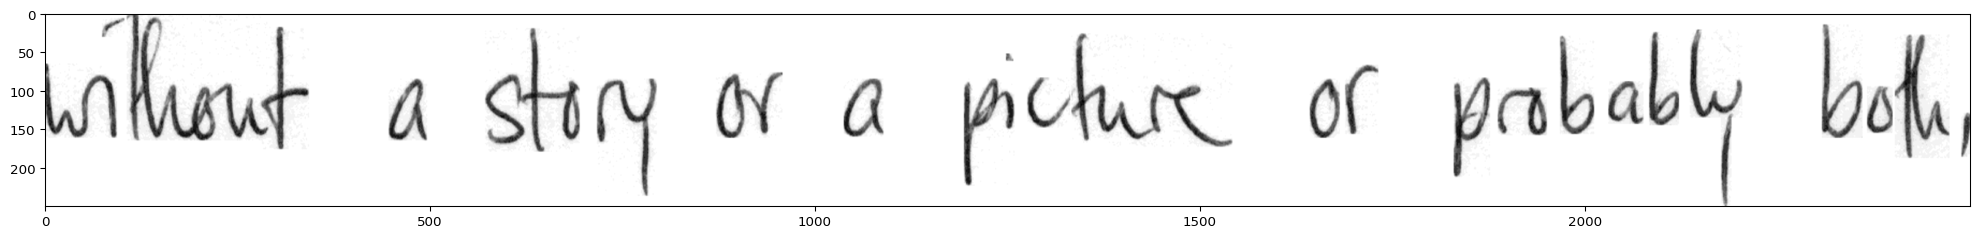

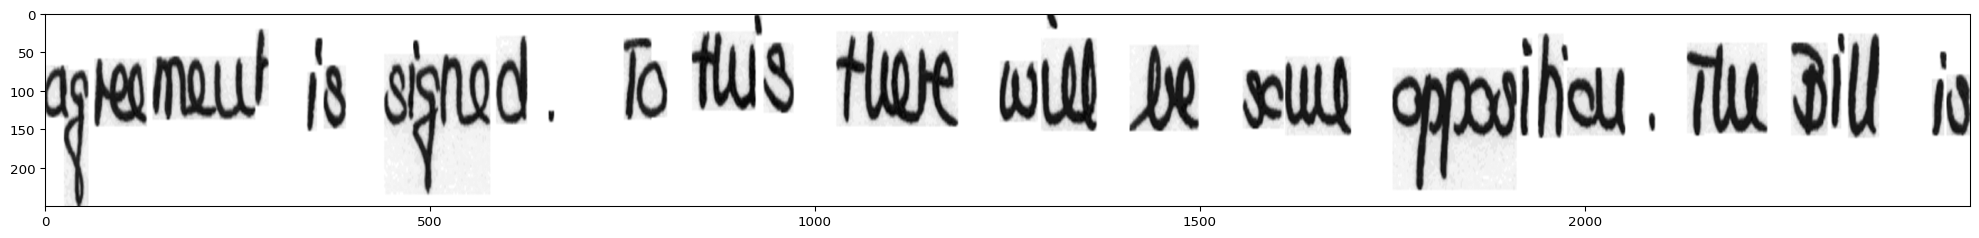

Keep aspect ratio


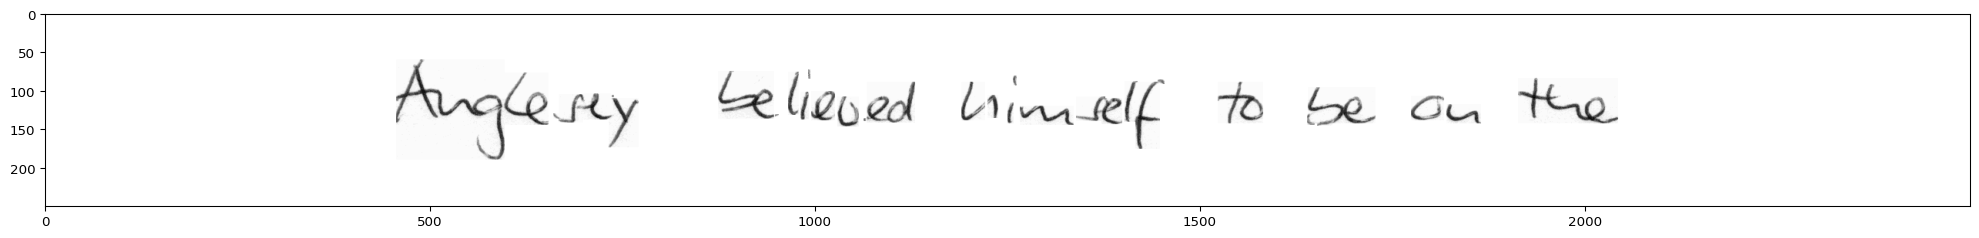

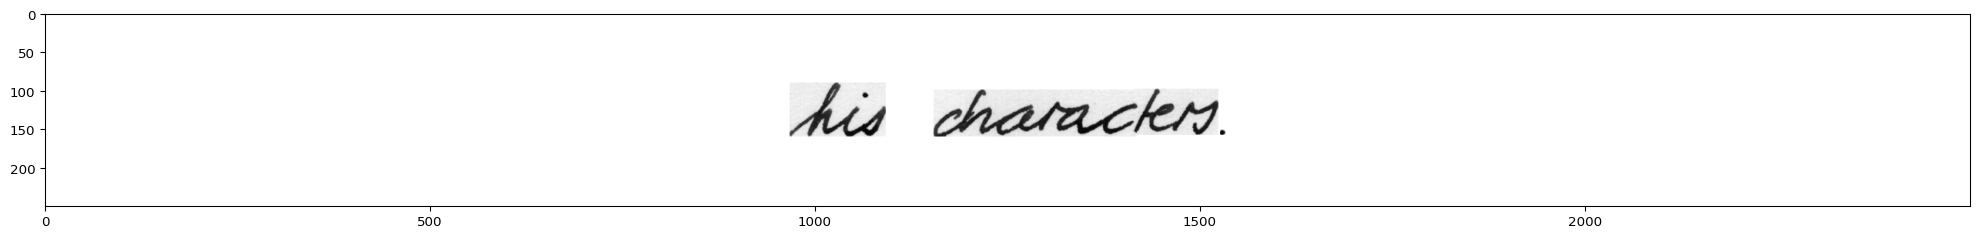

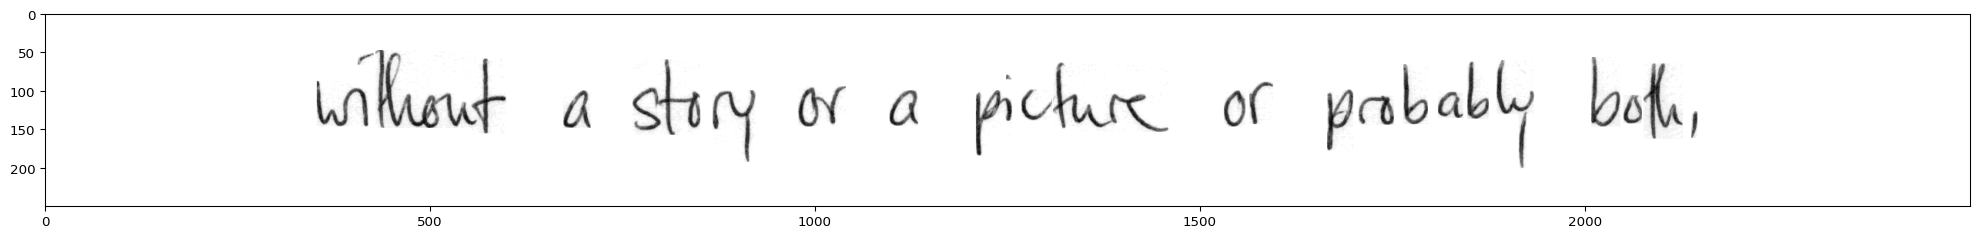

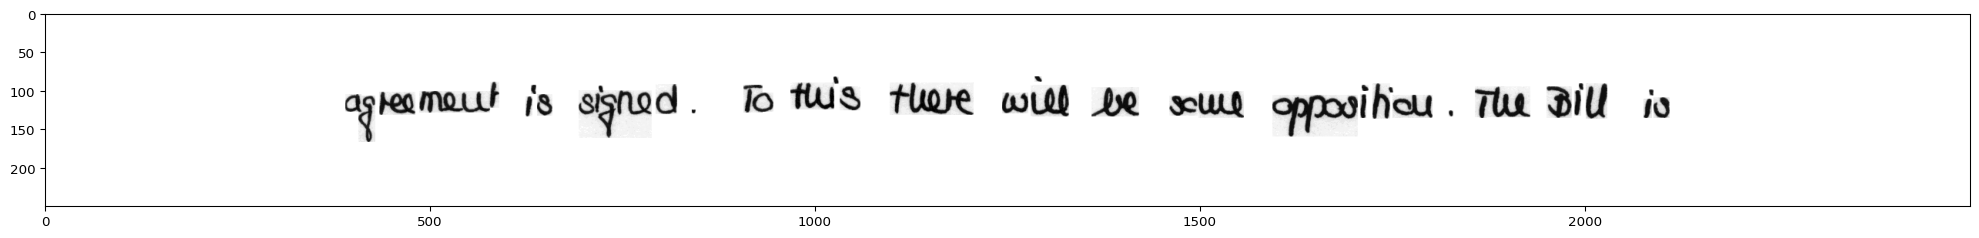

In [26]:
# choose a random directory and file
path = '../IAM-data/img'
save_path = '../IAM-data/test'
img_list0 = []

for i in range(4):
    random_file = random.choice(os.listdir(path))
    img = imageio.imread(os.path.join(path, random_file))
    # ia.imshow(img)
    img_list0.append(img)

print("Resize:")
w = 2500
h = 250
# show_images(img_list0)
img_list = pad_images(img_list0, h, w, keep_aspect_ratio=False)
img_list2 = pad_images(img_list0, h, w, keep_aspect_ratio=True)
# show_images(img_list)
for img in img_list:
    ia.imshow(img)

print("Keep aspect ratio")
for img in img_list2:
    ia.imshow(img)



In [28]:
import cv2

def add_diagonal_cuts(images, random_state, parents, hooks):
    """Add diagonal white cuts through the letter"""
    augm_imgs = []

    for image in images:
        number_of_cuts = random_state.randint(0, 4)

        for _ in range(number_of_cuts):
            # Choose a random point on the left margin of the image
            y_left = random_state.randint(0, image.shape[1])

            mid_y = image.shape[1] // 2

            # Choose a random point on the right margin of the image
            # The point must be on the opposite side of the image to
            #  simulate a diagonal cut
            if y_left < mid_y:
                y_right = random_state.randint(mid_y, image.shape[1])
            else:
                y_right = random_state.randint(0, mid_y)

            # Define the points to draw the line
            point_left = (0, y_left)
            point_right = (image.shape[0], y_right)

            # Choose a random thickness for the line
            thickness = random_state.randint(1, 3)

            # Draw the line on the mask
            image = cv2.line(
                image, point_left, point_right, (255, 255, 255), thickness)

        augm_imgs.append(image)

    return augm_imgs

In [31]:
rotation = (-10, 10)
shear = (-10, 10)
gauss_blur_sigma = (0, 2.0)
crop = (-0.2, 0.2)
elastic_alpha = (0, 20)
elastic_sigma = (4, 6)

Original batch:


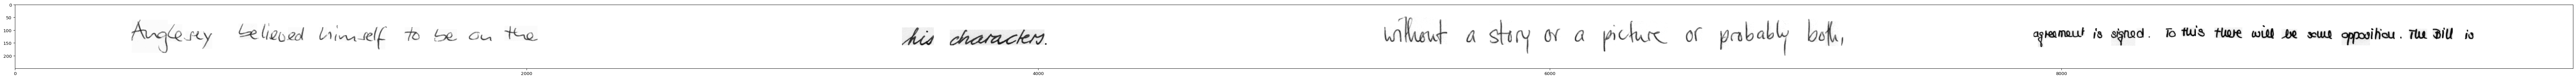

Augmented batch:


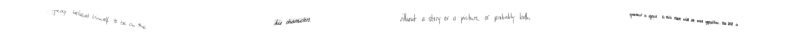

In [32]:
aug = iaa.Sequential([
    iaa.Affine(rotate=rotation, shear=shear, mode='constant', cval=255),
    iaa.GaussianBlur(sigma=gauss_blur_sigma),
    iaa.KeepSizeByResize(
        iaa.CropAndPad(percent=crop, pad_mode='constant', pad_cval=255)),
    iaa.Pad(px=2, pad_mode='constant', pad_cval=255),
    iaa.ElasticTransformation(alpha=elastic_alpha, sigma=elastic_sigma),
    iaa.size.Crop(px=2),
    iaa.Sometimes(
        0.5,
        iaa.Lambda(add_diagonal_cuts)
    ),
    iaa.Sometimes(
        0.1,
        iaa.KeepSizeByResize(
            iaa.CropAndPad(percent=(-0.5, 0.5), pad_mode='constant',
                           pad_cval=255))
    )
])

print("Original batch:")
ia.imshow(np.hstack(img_list2))

aug_image = aug(images=img_list2)
print("Augmented batch:")
# ia.imshow(np.hstack(aug_image))
show_images(aug_image)

for img in aug_image:
    ia.imshow(img)

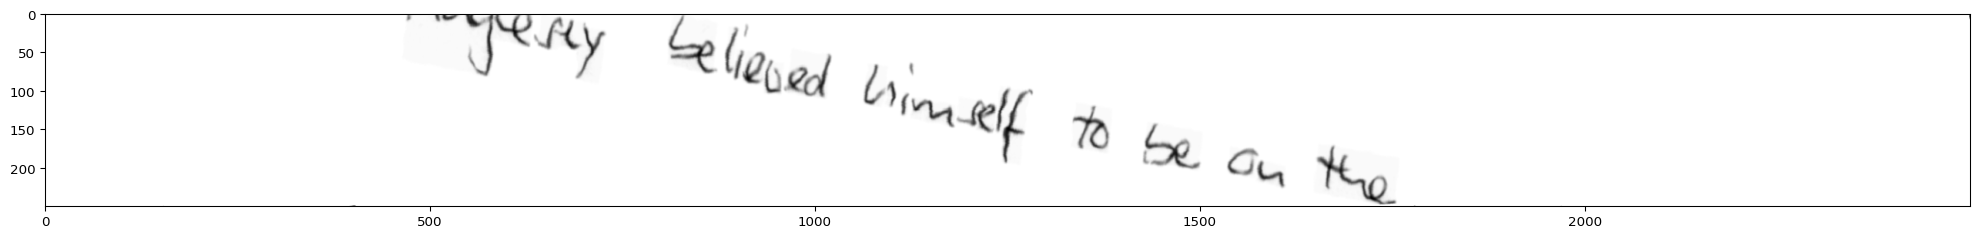

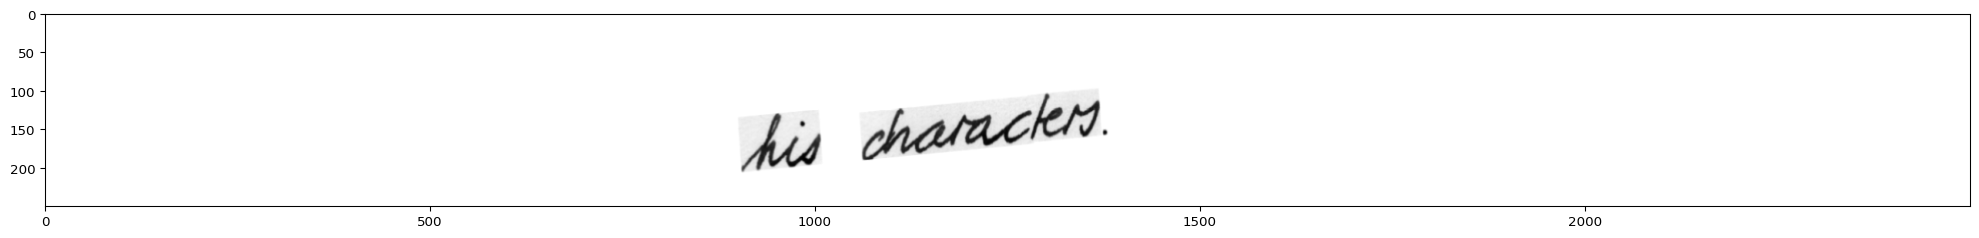

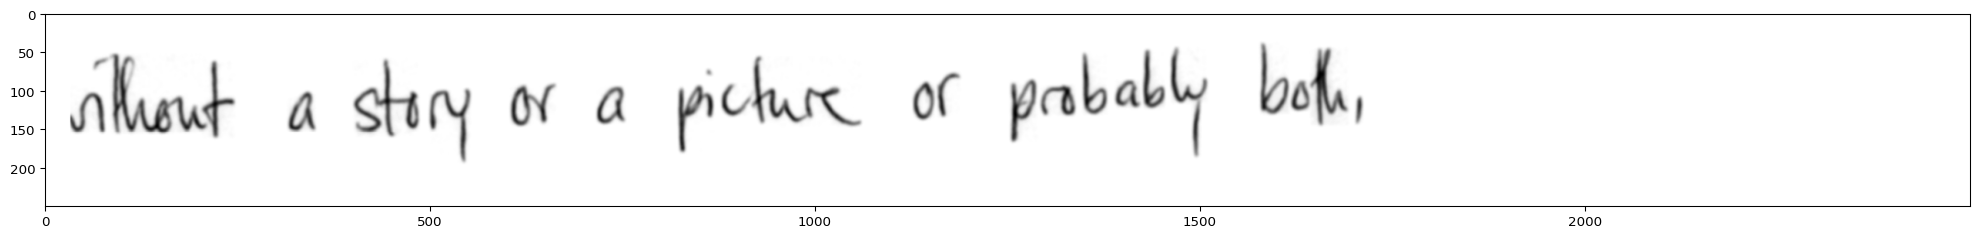

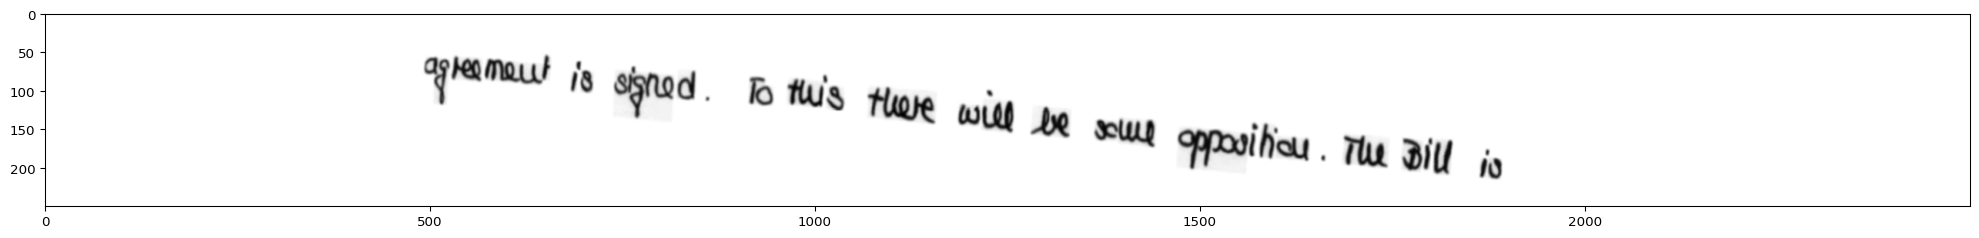

In [33]:
for img in aug_image:
    ia.imshow(img)